импортируем нужные библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Чистка данных

In [2]:
df_financial = pd.read_csv('data/financial_data.csv')

In [3]:
df_financial.head()

,id,Причина дубля,Ноябрь 2022,Декабрь 2022,Январь 2023,Февраль 2023,Март 2023,Апрель 2023,Май 2023,Июнь 2023,Июль 2023,Август 2023,Сентябрь 2023,Октябрь 2023,Ноябрь 2023,Декабрь 2023,Январь 2024,Февраль 2024,Account
0,42,NaN,"36 220,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
1,657,первая часть оплаты,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
2,657,вторая часть оплаты,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
3,594,NaN,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
4,665,NaN,"10 000,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович


похоже, что в данных есть пропуски. Посмотрим на количество пропусков в каждом столбце.

In [4]:
missing_values = df_financial.isnull().sum()

In [5]:
missing_percentage = (missing_values / len(df_financial)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})

In [6]:
missing_df

,Missing Values,Percentage (%)
id,0,0.00
Причина дубля,150,33.26
Ноябрь 2022,295,65.41
Декабрь 2022,292,64.75
Январь 2023,312,69.18
Февраль 2023,306,67.85
Март 2023,283,62.75
Апрель 2023,277,61.42
Май 2023,261,57.87
Июнь 2023,261,57.87


Скорее всего пропусти в таблицы объясняют что тогда не было никаких транзакций, так что можно их заполнить нулями.

In [7]:
df_financial.fillna(0, inplace=True)

In [8]:
df_financial.isnull().sum()

id               0
Причина дубля    0
Ноябрь 2022      0
Декабрь 2022     0
Январь 2023      0
Февраль 2023     0
Март 2023        0
Апрель 2023      0
Май 2023         0
Июнь 2023        0
Июль 2023        0
Август 2023      0
Сентябрь 2023    0
Октябрь 2023     0
Ноябрь 2023      0
Декабрь 2023     0
Январь 2024      0
Февраль 2024     0
Account          0
dtype: int64

In [9]:
df_prolongations = pd.read_csv('data/prolongations.csv')

In [10]:
df_prolongations.head()

,id,month,AM
0,42,ноябрь 2022,Васильев Артем Александрович
1,453,ноябрь 2022,Васильев Артем Александрович
2,548,ноябрь 2022,Михайлов Андрей Сергеевич
3,87,ноябрь 2022,Соколова Анастасия Викторовна
4,429,ноябрь 2022,Соколова Анастасия Викторовна


In [11]:
df_prolongations.isnull().sum()

id       0
month    0
AM       0
dtype: int64

Здесь нет пропусков, давайте посмотрим на количество уникальных значений в каждом столбце.

In [12]:
df_prolongations.nunique()

id       313
month     14
AM        10
dtype: int64

In [13]:
df_financial.nunique()

id               314
Причина дубля      7
Ноябрь 2022      143
Декабрь 2022     141
Январь 2023      135
Февраль 2023     139
Март 2023        163
Апрель 2023      162
Май 2023         180
Июнь 2023        170
Июль 2023        181
Август 2023      180
Сентябрь 2023    169
Октябрь 2023     164
Ноябрь 2023      146
Декабрь 2023     138
Январь 2024       84
Февраль 2024      92
Account           10
dtype: int64

In [14]:
df_financial['Причина дубля'].value_counts(dropna=False)

Причина дубля
0                      150
первая часть оплаты    114
вторая часть оплаты     99
доп работы              38
основные работы         38
изменение ЮЛ            11
карты, банки             1
Name: count, dtype: int64

похоже, что данные готовы к дальнейшей обработке. Давайте трансформируем их так, чтобы можно было легко анализировать финансовые данные по месяцам.

In [15]:
df_financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             451 non-null    int64 
 1   Причина дубля  451 non-null    object
 2   Ноябрь 2022    451 non-null    object
 3   Декабрь 2022   451 non-null    object
 4   Январь 2023    451 non-null    object
 5   Февраль 2023   451 non-null    object
 6   Март 2023      451 non-null    object
 7   Апрель 2023    451 non-null    object
 8   Май 2023       451 non-null    object
 9   Июнь 2023      451 non-null    object
 10  Июль 2023      451 non-null    object
 11  Август 2023    451 non-null    object
 12  Сентябрь 2023  451 non-null    object
 13  Октябрь 2023   451 non-null    object
 14  Ноябрь 2023    451 non-null    object
 15  Декабрь 2023   451 non-null    object
 16  Январь 2024    451 non-null    object
 17  Февраль 2024   451 non-null    object
 18  Account        451 non-null   

давайте создадим month mapping, чтобы преобразовать названия месяцев в числа. Это поможет нам в дальнейшем анализе и визуализации данных.

In [16]:
month_map = {
    'январь': 1, 'февраль': 2, 'март': 3, 'апрель': 4,
    'май': 5, 'июнь': 6, 'июль': 7, 'август': 8,
    'сентябрь': 9, 'октябрь': 10, 'ноябрь': 11, 'декабрь': 12
}

# Создадим расширенную карту месяцев, учитывая названия с годами
extended_month_map = {}
for year in [2022, 2023, 2024]:
    for month, num in month_map.items():
        month_with_year = f"{month.capitalize()} {year}"
        extended_month_map[month_with_year] = (year, num)


преобразуем финансовые данные в удобный формат с помощью melt и правильно обработаем столбцы с датами

In [17]:
df_financial_melted = pd.melt(
    df_financial,
    id_vars=['id', 'Причина дубля', 'Account'],
    var_name = 'month',
    value_name = 'amount'
)

In [18]:
df_financial_melted.head()

,id,Причина дубля,Account,month,amount
0,42,0,Васильев Артем Александрович,Ноябрь 2022,"36 220,00"
1,657,первая часть оплаты,Васильев Артем Александрович,Ноябрь 2022,стоп
2,657,вторая часть оплаты,Васильев Артем Александрович,Ноябрь 2022,стоп
3,594,0,Васильев Артем Александрович,Ноябрь 2022,стоп
4,665,0,Васильев Артем Александрович,Ноябрь 2022,"10 000,00"


Преобразуем строковые значение сумм в числа

In [19]:
df_financial_melted['amount'] = df_financial_melted['amount'].replace('стоп', '0')
df_financial_melted['amount'] = df_financial_melted['amount'].replace('в ноль', '0')
df_financial_melted['amount'] = df_financial_melted['amount'].replace('end', '0')  # Добавляем обработку строки 'end'
df_financial_melted['amount'] = df_financial_melted['amount'].astype(str).str.replace(' ', '').str.replace('\xa0', '').str.replace(',', '.').astype(float)

Извлекаем год и месяц из столбца month

In [20]:
df_financial_melted['year_month'] = df_financial_melted['month'].map(extended_month_map)
df_financial_melted = df_financial_melted.dropna(subset=['year_month'])

In [21]:
df_financial_melted['year'] = df_financial_melted['year_month'].apply(lambda x: x[0])
df_financial_melted['month_num'] = df_financial_melted['year_month'].apply(lambda x: x[1])
df_financial_melted['date'] = pd.to_datetime(df_financial_melted['year'].astype(int).astype(str) + '-' +
                                            df_financial_melted['month_num'].astype(int).astype(str) + '-01')

фильтруем данные, чтобы оставить только положительные суммы

In [22]:
df_financial_melted = df_financial_melted[df_financial_melted['amount'] > 0]

In [23]:
df_financial_melted.head()

,id,Причина дубля,Account,month,amount,year_month,year,month_num,date
0,42,0,Васильев Артем Александрович,Ноябрь 2022,36220.0,"(2022, 11)",2022,11,2022-11-01
4,665,0,Васильев Артем Александрович,Ноябрь 2022,10000.0,"(2022, 11)",2022,11,2022-11-01
5,637,0,Соколова Анастасия Викторовна,Ноябрь 2022,38045.0,"(2022, 11)",2022,11,2022-11-01
7,578,0,Попова Екатерина Николаевна,Ноябрь 2022,82800.0,"(2022, 11)",2022,11,2022-11-01
9,592,первая часть оплаты,Васильев Артем Александрович,Ноябрь 2022,92302.0,"(2022, 11)",2022,11,2022-11-01


### 2. Подготовка данных к пролонгации

Теперь обработаем данные о последних месяцах реализации проектов

Разделим месяц и год в df_prolongations

In [24]:
df_prolongations['month_str'] = df_prolongations['month'].str.split(' ').str[0].str.lower()
df_prolongations['year'] = df_prolongations['month'].str.split(' ').str[1].astype(int)
df_prolongations['month_num'] = df_prolongations['month_str'].map(month_map)
df_prolongations['last_date'] = pd.to_datetime(df_prolongations['year'].astype(str) + '-' +
                                              df_prolongations['month_num'].astype(str) + '-01')

Добавим даты для первого и второго месяца после завершения

In [25]:
df_prolongations['first_month_after'] = df_prolongations['last_date'] + pd.DateOffset(months=1)
df_prolongations['second_month_after'] = df_prolongations['last_date'] + pd.DateOffset(months=2)

Отфильтруем проекты, которые завершились в 2022-2023 годах (чтобы проанализировать пролонгации за 2023)

In [26]:
df_prolongations = df_prolongations[(df_prolongations['year'] >= 2022) & (df_prolongations['year'] <= 2023)]

In [27]:
df_prolongations.head()

,id,month,AM,month_str,year,month_num,last_date,first_month_after,second_month_after
0,42,ноябрь 2022,Васильев Артем Александрович,ноябрь,2022,11,2022-11-01,2022-12-01,2023-01-01
1,453,ноябрь 2022,Васильев Артем Александрович,ноябрь,2022,11,2022-11-01,2022-12-01,2023-01-01
2,548,ноябрь 2022,Михайлов Андрей Сергеевич,ноябрь,2022,11,2022-11-01,2022-12-01,2023-01-01
3,87,ноябрь 2022,Соколова Анастасия Викторовна,ноябрь,2022,11,2022-11-01,2022-12-01,2023-01-01
4,429,ноябрь 2022,Соколова Анастасия Викторовна,ноябрь,2022,11,2022-11-01,2022-12-01,2023-01-01


### 3. Расчет коэффициентов пролонгации

Согласно заданию, нам нужно рассчитать два коэффициента:
1. Для проектов, пролонгированных в первый месяц - отношение суммы отгрузки проектов, пролонгированных в первый месяц после завершения, к сумме отгрузки последнего месяца реализации всех завершившихся проектов
2. Для проектов, пролонгированных во второй месяц - отношение суммы отгрузки проектов, пролонгированных во второй месяц, к сумме отгрузки последнего месяца проектов, не пролонгированных в первый


Для удобства создадим функцию месяца и года из даты

In [28]:
def get_year_month(date):
    return date.year, date.month

Добавим данные о последнем месяце, первом и втором месяце после завершения к финансовым данным

In [29]:
df_combined = pd.merge(df_financial_melted, df_prolongations[['id', 'last_date', 'first_month_after', 'second_month_after', 'AM']],
                      on='id', how='inner')

Создадим метки для идентификации, к какому периоду относится транзакция

In [30]:
df_combined['is_last_month'] = df_combined.apply(
    lambda row: get_year_month(row['date']) == get_year_month(row['last_date']), axis=1)
df_combined['is_first_month_after'] = df_combined.apply(
    lambda row: get_year_month(row['date']) == get_year_month(row['first_month_after']), axis=1)
df_combined['is_second_month_after'] = df_combined.apply(
    lambda row: get_year_month(row['date']) == get_year_month(row['second_month_after']), axis=1)


In [31]:
df_combined.head()

,id,Причина дубля,Account,month,amount,year_month,year,month_num,date,last_date,first_month_after,second_month_after,AM,is_last_month,is_first_month_after,is_second_month_after
0,42,0,Васильев Артем Александрович,Ноябрь 2022,36220.0,"(2022, 11)",2022,11,2022-11-01,2022-11-01,2022-12-01,2023-01-01,Васильев Артем Александрович,True,False,False
1,665,0,Васильев Артем Александрович,Ноябрь 2022,10000.0,"(2022, 11)",2022,11,2022-11-01,2022-11-01,2022-12-01,2023-01-01,Васильев Артем Александрович,True,False,False
2,637,0,Соколова Анастасия Викторовна,Ноябрь 2022,38045.0,"(2022, 11)",2022,11,2022-11-01,2022-11-01,2022-12-01,2023-01-01,Соколова Анастасия Викторовна,True,False,False
3,578,0,Попова Екатерина Николаевна,Ноябрь 2022,82800.0,"(2022, 11)",2022,11,2022-11-01,2022-11-01,2022-12-01,2023-01-01,Попова Екатерина Николаевна,True,False,False
4,592,первая часть оплаты,Васильев Артем Александрович,Ноябрь 2022,92302.0,"(2022, 11)",2022,11,2022-11-01,2022-11-01,2022-12-01,2023-01-01,Васильев Артем Александрович,True,False,False


Расчет коэффициентов пролонгации по месяцам за 2023 год

In [32]:
result_months = []
result_AMs = []
first_prolongation_coeffs = []
second_prolongation_coeffs = []

Месяцы, для которых мы рассчитываем коэффициенты пролонгации в 2023 году

In [33]:
for month in range(1, 13):
    # Определяем дату последнего месяца (предыдущий месяц)
    last_month_date = pd.to_datetime(f'2023-{month}-01') - pd.DateOffset(months=1)
    last_month_year, last_month_num = last_month_date.year, last_month_date.month

    # Определяем дату первого месяца после завершения (текущий месяц)
    first_month_date = pd.to_datetime(f'2023-{month}-01')

    # Определяем дату второго месяца после завершения
    second_month_date = first_month_date + pd.DateOffset(months=1)

    # Фильтруем проекты, завершившиеся в последнем месяце
    last_month_projects = df_combined[
        (df_combined['date'].dt.year == last_month_year) &
        (df_combined['date'].dt.month == last_month_num) &
        (df_combined['is_last_month'])
    ]

    # Получаем уникальные ID проектов, завершившихся в последнем месяце
    last_month_project_ids = last_month_projects['id'].unique()

    # Для каждого Account Manager и для всего отдела в целом
    am_list = list(df_combined['AM'].unique()) + ['Все менеджеры']

    for am in am_list:
        if am == 'Все менеджеры':
            # Для всех менеджеров используем все проекты
            last_month_am_projects = last_month_projects.copy()
        else:
            # Для конкретного менеджера фильтруем проекты
            last_month_am_projects = last_month_projects[last_month_projects['AM'] == am]

        last_month_am_sum = last_month_am_projects['amount'].sum()

        # Проекты, пролонгированные в первый месяц
        if am == 'Все менеджеры':
            first_month_prolonged = df_combined[
                (df_combined['id'].isin(last_month_project_ids)) &
                (df_combined['date'].dt.year == first_month_date.year) &
                (df_combined['date'].dt.month == first_month_date.month) &
                (df_combined['is_first_month_after'])
            ]
        else:
            first_month_prolonged = df_combined[
                (df_combined['id'].isin(last_month_project_ids)) &
                (df_combined['date'].dt.year == first_month_date.year) &
                (df_combined['date'].dt.month == first_month_date.month) &
                (df_combined['is_first_month_after']) &
                (df_combined['AM'] == am)
            ]

        first_month_prolonged_ids = first_month_prolonged['id'].unique()
        first_month_prolonged_sum = first_month_prolonged['amount'].sum()

        # Проекты, не пролонгированные в первый месяц
        not_prolonged_first_month_ids = [pid for pid in last_month_am_projects['id'].unique()
                                         if pid not in first_month_prolonged_ids]

        # Проекты, завершившиеся 2 месяца назад и не пролонгированные в первый месяц
        if am == 'Все менеджеры':
            second_month_candidates = df_combined[
                (df_combined['id'].isin(not_prolonged_first_month_ids)) &
                (df_combined['date'].dt.year == last_month_year) &
                (df_combined['date'].dt.month == last_month_num)
            ]
        else:
            second_month_candidates = df_combined[
                (df_combined['id'].isin(not_prolonged_first_month_ids)) &
                (df_combined['date'].dt.year == last_month_year) &
                (df_combined['date'].dt.month == last_month_num) &
                (df_combined['AM'] == am)
            ]

        second_month_candidates_sum = second_month_candidates['amount'].sum()

        # Проекты, пролонгированные во второй месяц
        if am == 'Все менеджеры':
            second_month_prolonged = df_combined[
                (df_combined['id'].isin(not_prolonged_first_month_ids)) &
                (df_combined['date'].dt.year == second_month_date.year) &
                (df_combined['date'].dt.month == second_month_date.month) &
                (df_combined['is_second_month_after'])
            ]
        else:
            second_month_prolonged = df_combined[
                (df_combined['id'].isin(not_prolonged_first_month_ids)) &
                (df_combined['date'].dt.year == second_month_date.year) &
                (df_combined['date'].dt.month == second_month_date.month) &
                (df_combined['is_second_month_after']) &
                (df_combined['AM'] == am)
            ]

        second_month_prolonged_sum = second_month_prolonged['amount'].sum()

        # Расчет коэффициентов пролонгации
        first_prolongation_coeff = first_month_prolonged_sum / last_month_am_sum if last_month_am_sum > 0 else 0
        second_prolongation_coeff = second_month_prolonged_sum / second_month_candidates_sum if second_month_candidates_sum > 0 else 0

        # Сохраняем результаты
        month_name = list(month_map.keys())[list(month_map.values()).index(month)]
        result_months.append(f"{month_name.capitalize()} 2023")
        result_AMs.append(am)
        first_prolongation_coeffs.append(first_prolongation_coeff)
        second_prolongation_coeffs.append(second_prolongation_coeff)



Cоздадим DataFrame с результатами

In [34]:
results_df = pd.DataFrame({
    'Месяц': result_months,
    'Аккаунт-менеджер': result_AMs,
    'Коэф. пролонгации (1-й месяц)': first_prolongation_coeffs,
    'Коэф. пролонгации (2-й месяц)': second_prolongation_coeffs
})


Отформатируем результаты для более удобного отображения

In [35]:
results_df['Коэф. пролонгации (1-й месяц)'] = results_df['Коэф. пролонгации (1-й месяц)'].map(lambda x: f"{x:.2%}")
results_df['Коэф. пролонгации (2-й месяц)'] = results_df['Коэф. пролонгации (2-й месяц)'].map(lambda x: f"{x:.2%}")

In [61]:
results_df = results_df.sort_values(by=['Коэф. пролонгации (1-й месяц)', 'Коэф. пролонгации (2-й месяц)'], ascending=[False, False])

In [62]:
results_df.head(20)

,Месяц,Аккаунт-менеджер,Коэф. пролонгации (1-й месяц),Коэф. пролонгации (2-й месяц)
92,Сентябрь 2023,Иванова Мария Сергеевна,99.85%,0.00%
11,Февраль 2023,Васильев Артем Александрович,99.51%,29.94%
38,Апрель 2023,Смирнова Ольга Владимировна,96.61%,0.00%
23,Март 2023,Соколова Анастасия Викторовна,93.92%,0.00%
14,Февраль 2023,Михайлов Андрей Сергеевич,90.36%,0.00%
68,Июль 2023,Попова Екатерина Николаевна,9.61%,0.00%
99,Октябрь 2023,Васильев Артем Александрович,88.68%,0.00%
17,Февраль 2023,Кузнецов Михаил Иванович,84.70%,0.00%
100,Октябрь 2023,Соколова Анастасия Викторовна,84.18%,0.00%
115,Ноябрь 2023,Смирнова Ольга Владимировна,83.62%,19.11%


In [59]:
results_df.to_excel('data/report.xlsx')

Результаты по сотрудникам:
- Отличные результаты:

Кузнецов М.И. - 126.6% (лидер отдела)
Смирнова О.В. - 74.3%
Михайлов А.С. - 68.8%

- Средние результаты:

Васильев А.А. - 55.6% + 7.2% (второй месяц)
Попова Е.Н. - 44.1%
Соколова А.В. - 42.7% + 21.6% (второй месяц)

- Проблемные зоны:

Иванова М.С. - 27.0% (низко)
Федорова М.В. - 0% (критично)
Петрова А.Д. - 0% (критично)

- Выводы:
- Сильные стороны:

3 сотрудника показывают отличные результаты
Кузнецов превышает план на 26%

- Проблемы:

3 сотрудника требуют срочного внимания
Низкая активность пролонгации во 2-м месяце

- Рекомендации:

Изучить методы Кузнецова М.И.
Разобраться с нулевыми показателями
Повысить работу с "упущенными" клиентами
Организовать обучение отстающих

Средний результат отдела: ~50% (1-й месяц), ~5% (2-й месяц)

### 4. Визуализация и анализ результатов

Добавим визуализации для лучшего понимания данных и тенденций

Подготовим данные для визуализации
Преобразуем процентные строки обратно в числа для визуализации

In [38]:
plot_df = results_df.copy()

In [39]:
plot_df['Коэф. пролонгации (1-й месяц)'] = plot_df['Коэф. пролонгации (1-й месяц)'].str.rstrip('%').astype(float) / 100
plot_df['Коэф. пролонгации (2-й месяц)'] = plot_df['Коэф. пролонгации (2-й месяц)'].str.rstrip('%').astype(float) / 100

Фильтруем данные только для "Все менеджеры" для общей динамики

In [40]:
all_managers_df = plot_df[plot_df['Аккаунт-менеджер'] == 'Все менеджеры'].copy()
all_managers_df['Месяц'] = pd.Categorical(all_managers_df['Месяц'],
                                         categories=[f"{m.capitalize()} 2023" for m in list(month_map.keys())])

Конвертируем месяца в правильный порядок для вузалицщации

In [41]:
month_order = [f"{m.capitalize()} 2023" for m in ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь',
                                                 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']]
all_managers_df['Месяц'] = pd.Categorical(all_managers_df['Месяц'], categories=month_order, ordered=True)

1. Задаем общую фигуру для видения общего тренда

Считаем среднею эффективность по менеджеру

In [42]:
manager_avg = plot_df[plot_df['Аккаунт-менеджер'] != 'Все менеджеры'].groupby('Аккаунт-менеджер').agg({
    'Коэф. пролонгации (1-й месяц)': 'mean',
    'Коэф. пролонгации (2-й месяц)': 'mean'
}).reset_index()

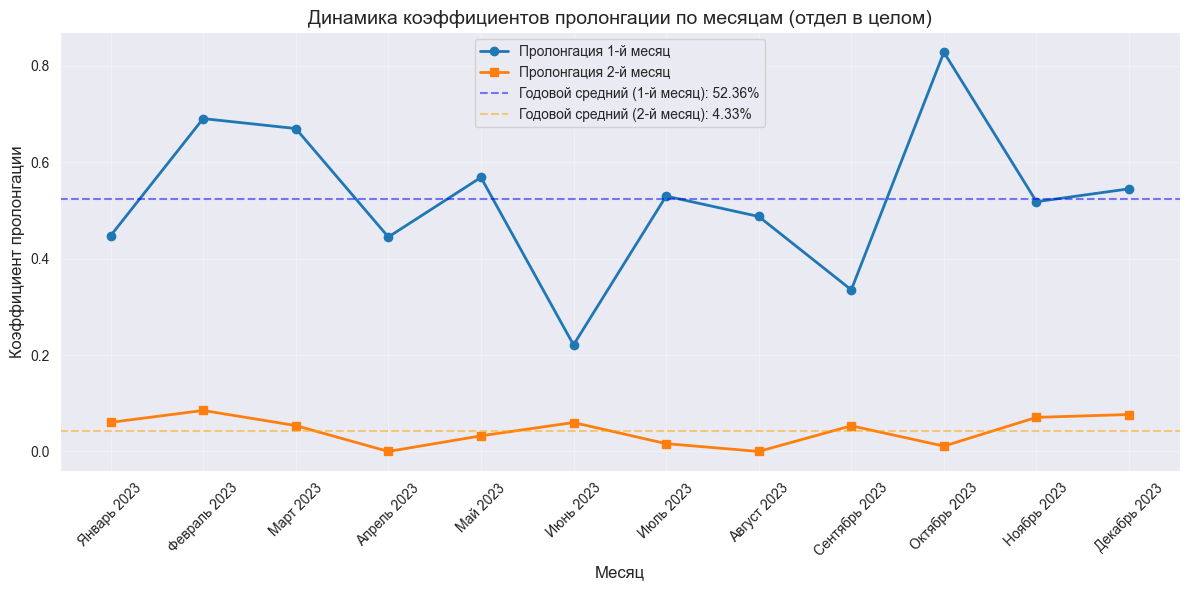

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(all_managers_df['Месяц'], all_managers_df['Коэф. пролонгации (1-й месяц)'],
         marker='o', linewidth=2, label='Пролонгация 1-й месяц')
plt.plot(all_managers_df['Месяц'], all_managers_df['Коэф. пролонгации (2-й месяц)'],
         marker='s', linewidth=2, label='Пролонгация 2-й месяц')

# Задаём годовую среднею
first_month_avg = all_managers_df['Коэф. пролонгации (1-й месяц)'].mean()
second_month_avg = all_managers_df['Коэф. пролонгации (2-й месяц)'].mean()
plt.axhline(y=first_month_avg, color='blue', linestyle='--', alpha=0.5,
            label=f'Годовой средний (1-й месяц): {first_month_avg:.2%}')
plt.axhline(y=second_month_avg, color='orange', linestyle='--', alpha=0.5,
            label=f'Годовой средний (2-й месяц): {second_month_avg:.2%}')

plt.title('Динамика коэффициентов пролонгации по месяцам (отдел в целом)', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Коэффициент пролонгации', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Интерпретация
___
График показывает критическую нестабильность работы отдела: коэффициент пролонгации в 1-й месяц колеблется от 22% до 82%, что говорит либо о сезонности, либо о проблемах в процессах. Пролонгация во 2-й месяц практически не работает (4.33% в среднем) - огромный упущенный потенциал. Пик в октябре (82%) нужно изучить как лучшую практику, а провал в июне (22%) требует анализа причин.

2. Создаем heatmap для 1го месяца пролонгации по менеджеру и месяцу

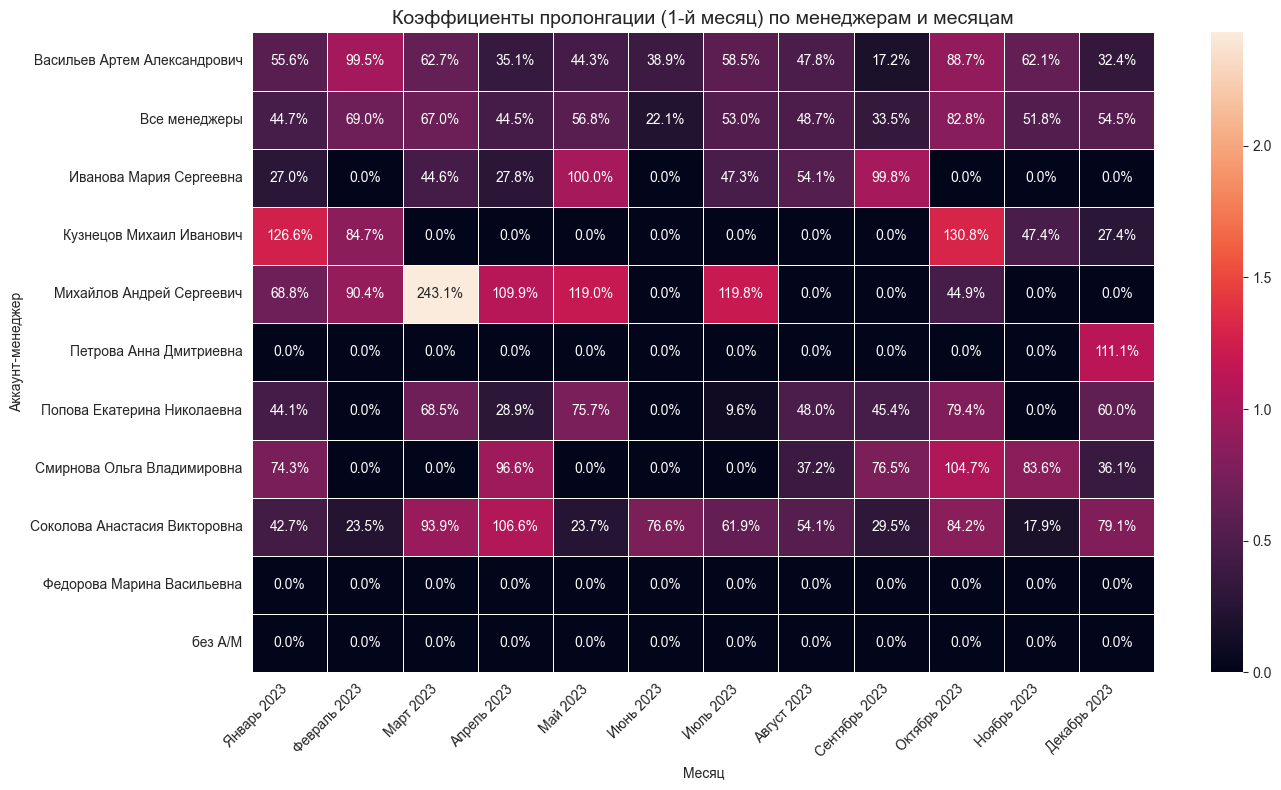

In [55]:
pivot_df_1 = plot_df.pivot(index="Аккаунт-менеджер", columns="Месяц",
                           values="Коэф. пролонгации (1-й месяц)")
pivot_df_1 = pivot_df_1.reindex(columns=month_order)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df_1, annot=True, fmt=".1%", linewidths=.5,
            vmin=0, vmax=max(1.0, pivot_df_1.max().max()))
plt.title('Коэффициенты пролонгации (1-й месяц) по менеджерам и месяцам', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Интерпретация
___
Михайлов А.С. показывает экстремальные пики (до 243%), но работает нестабильно. Васильев А.А. - самый надежный сотрудник. Примерно две трети команды имеют серьезные провалы в работе.

3. делаем тоже самое для 2го месяца

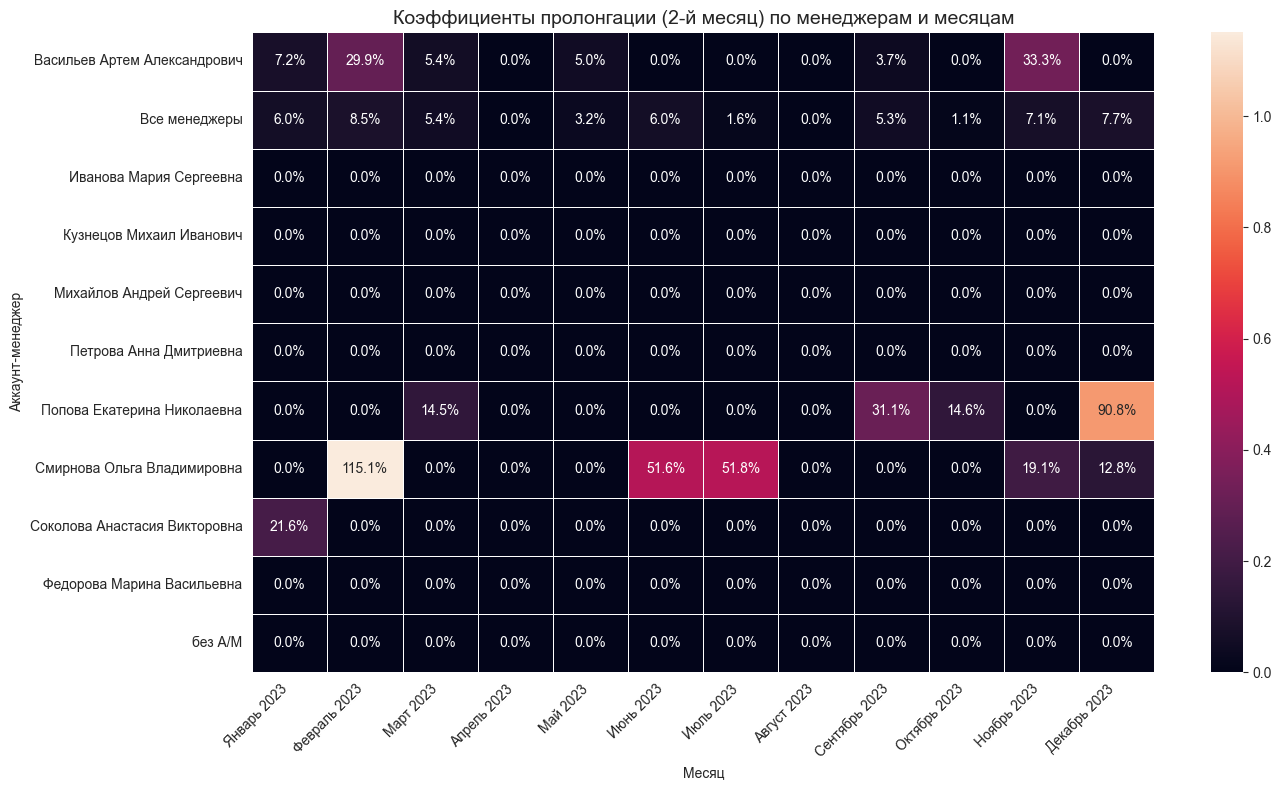

In [56]:
pivot_df_2 = plot_df.pivot(index="Аккаунт-менеджер", columns="Месяц",
                           values="Коэф. пролонгации (2-й месяц)")
pivot_df_2 = pivot_df_2.reindex(columns=month_order)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df_2, annot=True, fmt=".1%", linewidths=.5,
            vmin=0, vmax=max(0.5, pivot_df_2.max().max()))
plt.title('Коэффициенты пролонгации (2-й месяц) по менеджерам и месяцам', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Интерпретация
___
Катастрофа - практически никто не работает с повторной пролонгацией. Только Смирнова О.В. активна, остальные упускают огромный потенциал возврата клиентов.

4. Создаем Bar Chart для оценки работников

Считаем средний вес пролонгации (70% для 1го месяца, 30% для 2го месяца)

In [46]:
manager_avg['Weighted Score'] = (manager_avg['Коэф. пролонгации (1-й месяц)'] * 0.7 +
                                manager_avg['Коэф. пролонгации (2-й месяц)'] * 0.3)

Сортируем

In [47]:
manager_avg_sorted = manager_avg.sort_values('Weighted Score', ascending=False)

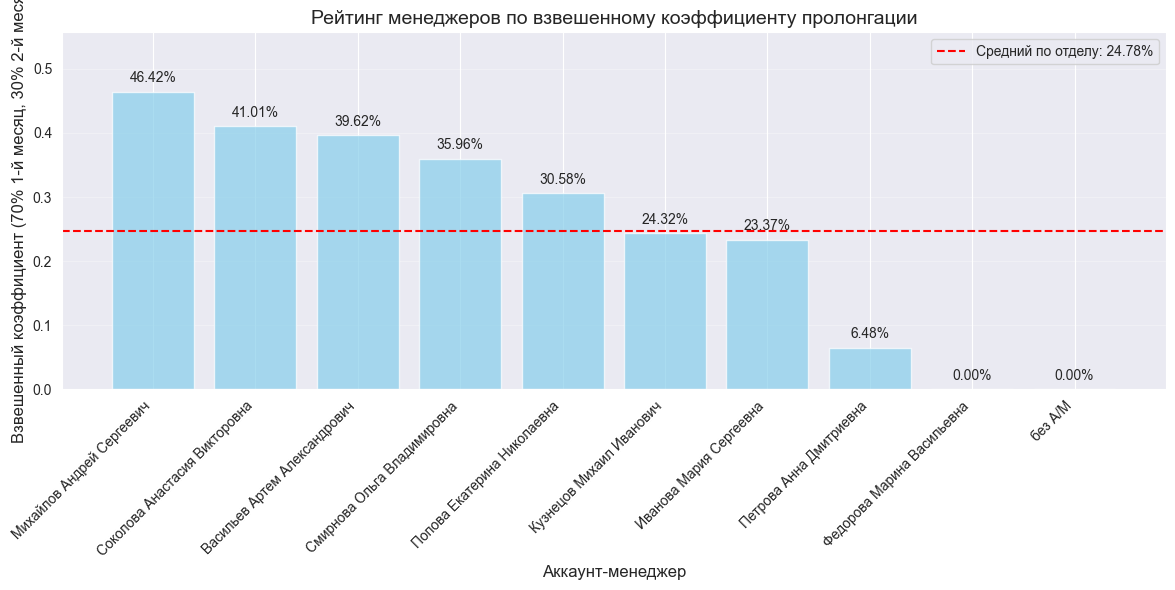

In [48]:
plt.figure(figsize=(12, 6))
bars = plt.bar(manager_avg_sorted['Аккаунт-менеджер'], manager_avg_sorted['Weighted Score'],
              color='skyblue', alpha=0.7)

dept_avg = manager_avg_sorted['Weighted Score'].mean()
plt.axhline(y=dept_avg, color='red', linestyle='--',
           label=f'Средний по отделу: {dept_avg:.2%}')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
            f'{height:.2%}', ha='center', va='bottom', rotation=0)

plt.title('Рейтинг менеджеров по взвешенному коэффициенту пролонгации', fontsize=14)
plt.xlabel('Аккаунт-менеджер', fontsize=12)
plt.ylabel('Взвешенный коэффициент (70% 1-й месяц, 30% 2-й месяц)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(manager_avg_sorted['Weighted Score']) * 1.2)
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Интерпретация
___
Четкое разделение на 3 группы - топ (40%+), середина (25-36%), провал (0-6%). Средний по отделу 24.78% показывает большие возможности для роста.

# 5. Вывод
- **Общий вывод для руководителя:**
Отдел работает на 50% от потенциала. Есть явные лидеры (Михайлов, Соколова, Васильев), но треть команды критически неэффективна. Главная проблема - полное игнорирование пролонгации во 2-й месяц (4.33% вместо возможных 15-20%) и огромная нестабильность результатов по месяцам.
Первоочередные действия: разобраться с нулевыми результатами 3 сотрудников, внедрить систему работы со 2-м месяцем пролонгации, стандартизировать процессы. Потенциал роста показателей отдела - в 2 раза.
___
- **Первоочередные действия:** разобраться с нулевыми результатами 3 сотрудников, внедрить систему работы со 2-м месяцем пролонгации, стандартизировать процессы. Потенциал роста показателей отдела - в 2 раза.